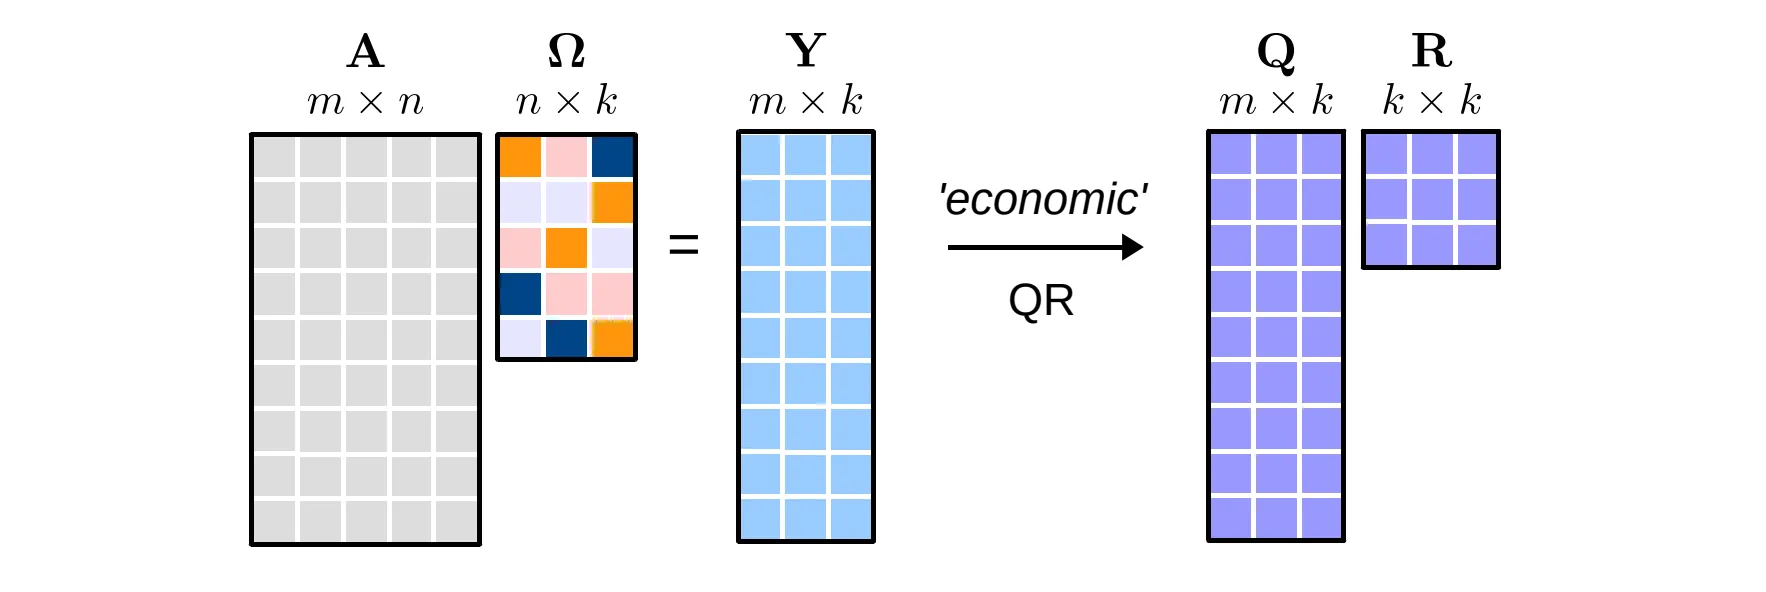

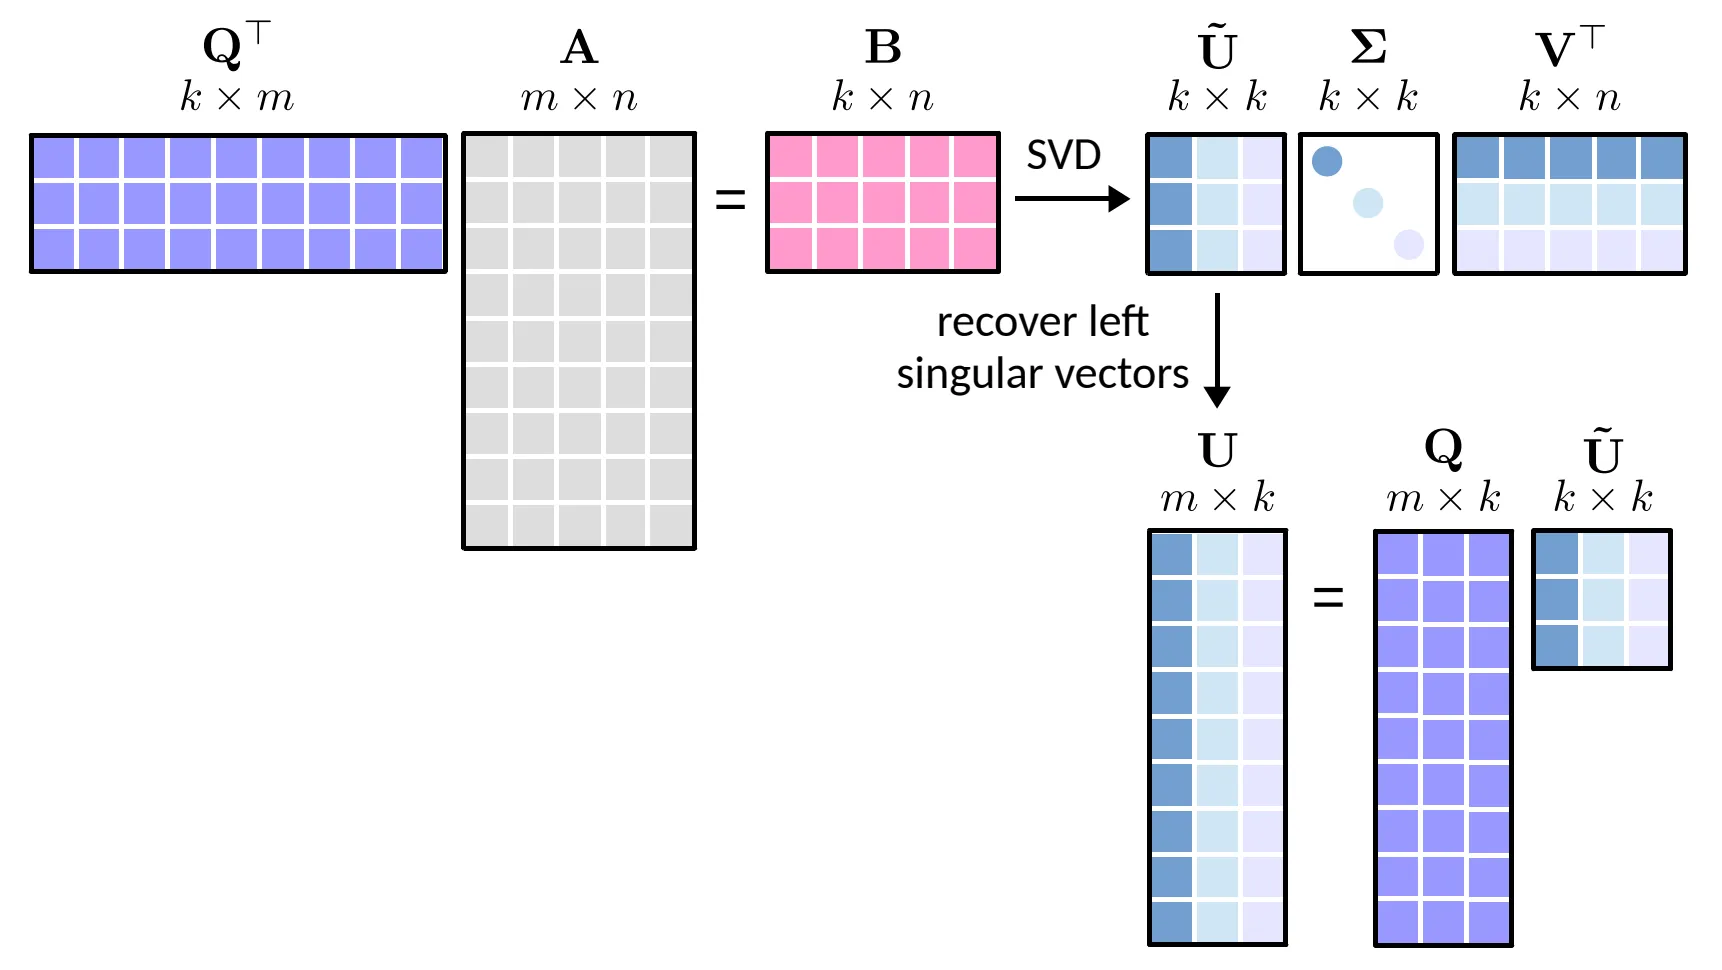

In [1]:
import numpy as np
A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
u, s, v = np.linalg.svd(A, full_matrices = 0)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()

Left singular vectors:
[[-0.37421754  0.28475648 -0.88253894]
 [-0.56470638 -0.82485997 -0.02669705]
 [-0.7355732   0.48838486  0.46948087]]

Singular values:
[9.34265841 3.24497827 1.08850813]

Right singular vectors:
[[-0.57847229 -0.61642675 -0.53421706]
 [-0.73171177  0.10269066  0.67383419]
 [ 0.36051032 -0.78068732  0.51045041]]



In [2]:
import numpy as np
def rsvd(A, Omega):
    Y = A @ Omega
    Q, _ = np.linalg.qr(Y)
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

In [3]:
np.random.seed(1000)
A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
rank = 2
Omega = np.random.randn(A.shape[1], rank)
u, s, v = rsvd(A, Omega)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()

Left singular vectors:
[[ 0.38070859  0.60505354]
 [ 0.56830191 -0.74963644]
 [ 0.72944767  0.26824507]]

Singular values:
[9.34224023 3.02039888]

Right singular vectors:
[[ 0.57915029  0.61707064  0.53273704]
 [-0.77420021  0.21163814  0.59650929]]



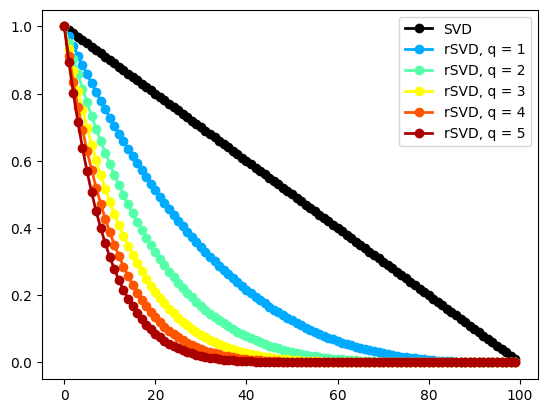

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Illustrate power iterations
X = np.random.randn(1000,100)
U, S, VT = np.linalg.svd(X,full_matrices=0)
S = np.arange(1,0,-0.01)
X = U @ np.diag(S) @ VT

color_list = np.array([[0,0,2/3],  # Define color map
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

plt.plot(S,'o-',color='k',linewidth=2,label='SVD')

Y = X
for q in range(1,6):
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)
    plt.plot(Sq,'-o',color=tuple(color_list[2*q+1]),linewidth=2,label='rSVD, q = '+str(q))

plt.legend()
plt.show()

In [5]:
def power_iteration(A, Omega, power_iter = 3):
    Y = A @ Omega
    for q in range(power_iter):
        Y = A @ (A.T @ Y)
    Q, _ = np.linalg.qr(Y)
    return Q
def rsvd(A, Omega):
    Q = power_iteration(A, Omega)
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

In [6]:
np.random.seed(1000)
A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
rank = 2
Omega = np.random.randn(A.shape[1], rank)
u, s, v = rsvd(A, Omega)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()

Left singular vectors:
[[ 0.37421757  0.28528579]
 [ 0.56470638 -0.82484381]
 [ 0.73557319  0.48810317]]

Singular values:
[9.34265841 3.24497775]

Right singular vectors:
[[ 0.57847229  0.61642675  0.53421706]
 [-0.73178429  0.10284774  0.67373147]]

